<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a><div align="center">This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.</div>

---

## Preamble

Import NumPy here so we are sure we can use it throughout the notebook.

In [1]:
import numpy as np

----

## Exercise 4.A

Write a function `plotfn(xs, f)` that takes two arguments: a list (or array) of numbers `xs` and a mathematical function `f` (one single numerical argument, returns a number) and plots the graph of `f` on the domain `xs`.

First, let us make sure that the graphics modules are loaded and graphics is displayed inline in the notebook.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sea
sea.set_style('darkgrid')

Now, on to the solution proper:

In [3]:
def plotfn(xs, f):
    ys = list(map(f, xs))
    return plt.plot(xs, ys)

We can check the solution by graphing a few well-known functions:

In [4]:
xs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

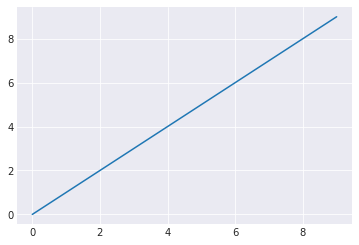

In [5]:
def f1(x):
    return x

plotfn(xs, f1)

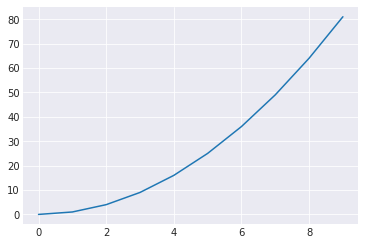

In [6]:
def f2(x):
    return x*x

plotfn(xs, f2)

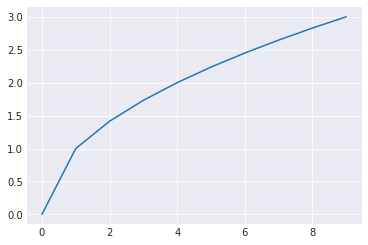

In [7]:
from math import sqrt

def f3(x):
    return sqrt(x)

plotfn(xs, f3)

### Bonus points 

Make a `plotfn2(xs, f, filename)` function that is just like `plotfn()` but takes an additional argument (a file name) and saves the figure into that file.

This requires that we change the structure of the function code a bit and explicitly grab the *axes* (for drawing) and *figure* object (for saving).

In [8]:
def plotfn2(xs, f, filename):
    ax, fig = plt.subplots(1, 1, figsize=[10, 7])
    # do the drawing
    ys = map(f, xs)
    ax.plot(xs, ys)
    # save figure
    fig.savefig(filename)
    return ax

### More bonus points

Write a `plotfn3(xs, fs)` function that is exactly like `plotfn(xs, f)` but takes a list of mathematical functions `fs` (instead of a single function `f`) and plots all of them (on the same "graph paper").

We can adapt the structure of the `plotfn2()` function, and just loop the "drawing" part over the list of functions `fs`:

In [9]:
def plotfn3(xs, fs):
    fig, ax = plt.subplots(1, 1, figsize=[10, 7])
    # do the drawing
    for f in fs:
        ys = list(map(f, xs))
        ax.plot(xs, ys)
    return ax

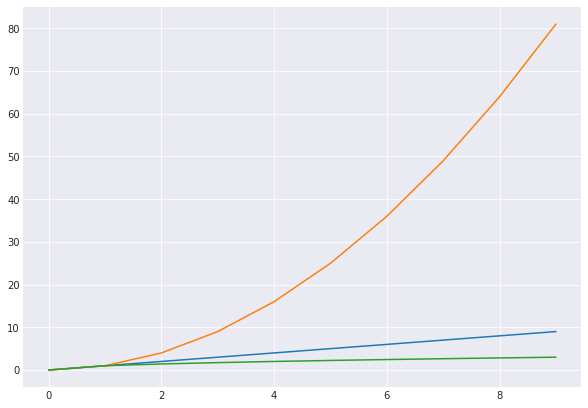

In [10]:
plotfn3(xs, [f1, f2, f3])

----

### Exercise 4.B

Plot the graph of function $f(x) = 1/x$

/home/rmurri/w/anaconda3/5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


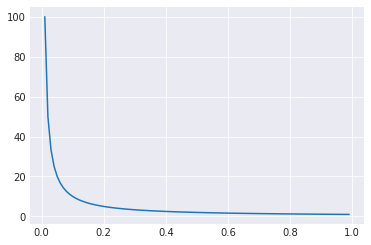

In [11]:
# the x-axis interval
x = np.arange(0, 1, 0.01) # it would be better to start at 0 + (a small amount)

# use "broadcasting" to compute the y-values
y = 1.0 / x

# plot!
plt.plot(x, y)

----

### Exercise 4.C

What is the exact size of the butterfly picture? 

What are the dimensions of the `img1` array?

In [12]:
# load the butterfly picture
from matplotlib.image import imread
img1 = imread('butterfly.png')

# `.shape` is the size of the array in each dimension
print(img1.shape)

(567, 960, 3)


Documentation for the [`matplotlib.image.imread`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imread.html) function states that the returned array is $M \times N \times 3$ for an RGB image, so the `butterfly.png` picture is 567 pixel high and 960 pixel wide.

----

### Exercise 4.D

Plot the functions $sin(x)$ and $2 \cdot cos(x) - 1$ on the interval $[-\pi, +\pi]$.

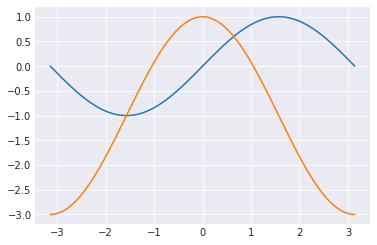

In [13]:
# the x-axis interval
x = np.arange(-np.pi, +np.pi, 0.01)

# use "broadcasting" to compute the y-values
y1 = np.sin(x)
y2 = 2*np.cos(x) - 1

# plot!
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)

----

### Exercise 4.E

Define a function `gaussian(mu, sigma, X)` which, given an array `X` of numbers and real-valued coefficients `mu` and `sigma`,  computes the values of the Gaussian function $g_{\mu, \sigma}(x) = \frac{1}{\sigma \sqrt{2\pi}} \cdot \mathrm{e}^{-(x-\mu)^2/2\sigma^2}$ over all items $x$ in `X`.  Plot the results of `gaussian(0, 1, X)` when `X` is the real interval $[-2, +2]$.

In [14]:
def _gaussian(mu, sigma, x):
    "Compute values of a Gaussian over items of array `x`."
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

gaussian = np.vectorize(_gaussian)

We can make a simple plot to check:

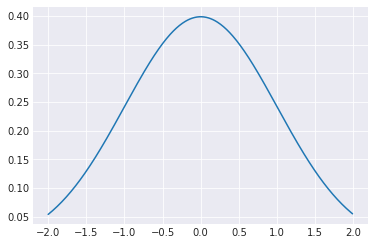

In [15]:
# extrema of the interval [-2, +2]
u = 2

# sampling interval
d = 0.01

# x-axis points
xs = np.arange(-u, +u, d)

# y-values
ys = gaussian(0.0, 1.0, xs)

# plot!
plt.plot(xs, ys)

----

### Exercise 4.F

To convert an image from RGB to gray scale, the following approximate procedure can be applied:

1. Convert each channel value of each pixel to an intensity value in the (real) range $[0, 1]$
2. Transform each intensity value $c$ according to the formula $c \mapsto ((c + 0.055) / 1.055)^{2.4}$
3. The gray intensity $y$ is defined by the formula: $y = 0.2126\cdot r + 0.7152\cdot g + 0.0722 \cdot b$.

Make a gray-scale version of the `butterfly.png` image and show it.

(For more information, see the [Wikipedia page "Grayscale"](https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale))

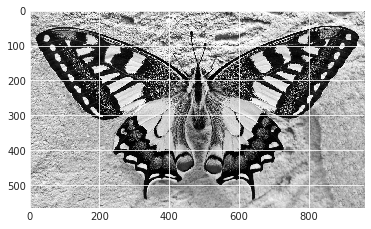

In [16]:
# read image into `img1`
from matplotlib.image import imread
img1 = imread('butterfly.png')

# copy into new array of dtype "float"
img2 = np.array(img1, dtype=np.float)

# 1. rescale intensities to interval [0,1]
img2 /= 255

# 2. transform intensity values (use in-place modification to avoid copies)
img2 += 0.055
img2 /= 1.055
img2 **= 2.4

# 3. linear combination of the three color channels
r = img2[:, :, 0]
g = img2[:, :, 1]
b = img2[:, :, 2]
y = 0.2126*r + 0.7152*g + 0.0722*b

# rescale `y` to use the full 0.0--1.0 range
y -= np.min(y)
y /= np.max(y)

# now show the grayscale image
plt.imshow(y, cmap='gray')

We can also load the `gray-butterfly.png` image (converted by ImageMagick) and plot the difference of the two:

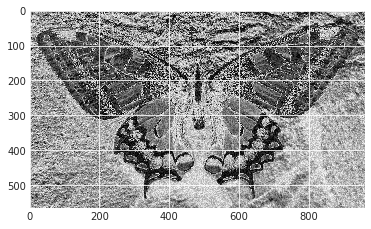

In [17]:
# load grayscaled image 
Y = imread('gray-butterfly.png')

# compute difference image
delta = np.abs(Y-y)

# show it
plt.imshow(delta, cmap='gray')